# Exploratory Data Analysis
This notebook contains visualisation, analysis from the given data

In [1]:
# import some libraries
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Sanity checking the data

In [2]:
#load training and testing data

raw_train = pd.read_csv("uc_data_train.csv", encoding='UTF-8')
raw_train = raw_train.loc[:, ~raw_train.columns.str.contains('Unnamed')]
raw_test = pd.read_csv("uc_data_test.csv", encoding='UTF-8')
raw_test = raw_test.loc[:, ~raw_test.columns.str.contains('Unnamed')]

#copy data for visualisation - some plot does not need customer id
train_data = raw_train.copy().drop(columns=['customer_id'])
test_data = raw_test.copy().drop(columns=['customer_id'])

#check the number of customer and features
print(train_data.shape)
print(test_data.shape)

(80001, 13)
(19999, 12)


In [3]:
#print the type of training data, size_womenswear is the label
print(train_data.head())

   size_womenswear  total_number_of_orders  return_rate  first_order_channel  \
0               16                      28         0.12                    1   
1               20                     118         0.61                    2   
2                8                     125         0.04                    2   
3               12                     109         0.42                    1   
4               16                      37         0.26                    1   

  socioeconomic_status  size_corsetry_cup  size_corsetry_briefs  \
0                    C                  7                    16   
1                    H                  3                    20   
2                    F                  3                    12   
3                    F                  5                    12   
4                    I                  4                    16   

   size_footware  days_since_first_order    brand  age_in_years  \
0              7                    4964  Brand 1

In [4]:
#check missing values per each column
train_data.isnull().sum() 

#result: there is no missing values in this dataset

size_womenswear           0
total_number_of_orders    0
return_rate               0
first_order_channel       0
socioeconomic_status      0
size_corsetry_cup         0
size_corsetry_briefs      0
size_footware             0
days_since_first_order    0
brand                     0
age_in_years              0
socioeconomic_desc        0
order_method              0
dtype: int64

# Exploratory data analysis - Distribution

In [5]:
#check the type of each variable
train_data.describe()

#result: there is no outlier in this dataset

,size_womenswear,total_number_of_orders,return_rate,first_order_channel,size_corsetry_cup,size_corsetry_briefs,size_footware,days_since_first_order,age_in_years
count,80001.000000,80001.000000,80001.000000,80001.000000,80001.000000,80001.000000,80001.000000,80001.000000,80001.000000
mean,18.919214,60.257009,0.252652,1.740603,4.340333,19.332358,6.420095,3127.136973,56.253884
std,4.963092,63.895477,0.204846,0.438306,1.639667,5.326279,1.460409,2769.613690,15.345527
min,8.000000,0.000000,0.000000,1.000000,2.000000,8.000000,1.000000,4.000000,18.000000
25%,16.000000,19.000000,0.080000,1.000000,3.000000,16.000000,5.000000,1104.000000,46.000000
50%,20.000000,39.000000,0.210000,2.000000,4.000000,20.000000,6.000000,2234.000000,57.000000
75%,24.000000,78.000000,0.400000,2.000000,5.000000,24.000000,7.000000,4239.000000,68.000000
max,36.000000,953.000000,1.000000,2.000000,9.000000,48.000000,17.000000,23439.000000,118.000000


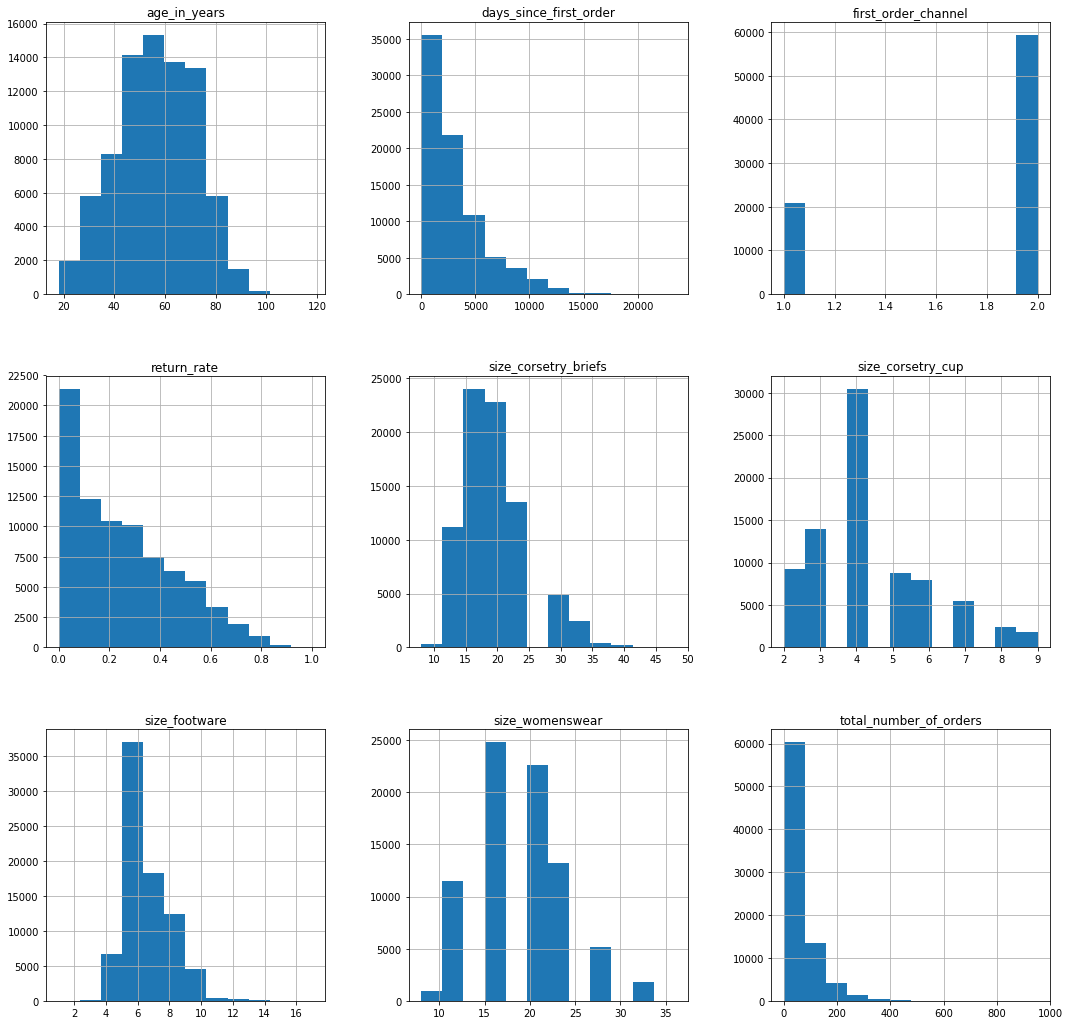

In [6]:
#histogram per feature
train_data.hist(bins=12, figsize=(18,18))
plt.show()

#result: size of womenswear, corsetry brief, footwear and age have similar trend
#  corsetry cup has a different trend than the previous features
#  days since first order, total number of orders and return rate share similar pattern

# Exploratory data analysis -  Correlation

In [7]:
#checking correlation per feature pair with Pearson correlation
corr = train_data.corr()
corr.style.background_gradient().set_precision(2)

#result: the strongest relationship is size womenswear and corsetry briefs
#  total number of orders and days since first order demonstrate high association
#  size footwear and size womenswear as well as size footwear and size corsetry briefs
#     have weak correlation

,size_womenswear,total_number_of_orders,return_rate,first_order_channel,size_corsetry_cup,size_corsetry_briefs,size_footware,days_since_first_order,age_in_years
size_womenswear,1,0.057,-0.035,-0.012,0.14,0.78,0.3,0.061,-0.049
total_number_of_orders,0.057,1,0.19,-0.13,-0.08,0.072,-0.015,0.73,0.32
return_rate,-0.035,0.19,1,-0.078,0.019,-0.022,-0.034,0.22,0.11
first_order_channel,-0.012,-0.13,-0.078,1,0.0055,-0.016,0.002,-0.2,-0.063
size_corsetry_cup,0.14,-0.08,0.019,0.0055,1,0.11,0.023,-0.081,-0.19
size_corsetry_briefs,0.78,0.072,-0.022,-0.016,0.11,1,0.27,0.088,-0.0089
size_footware,0.3,-0.015,-0.034,0.002,0.023,0.27,1,-0.023,-0.13
days_since_first_order,0.061,0.73,0.22,-0.2,-0.081,0.088,-0.023,1,0.44
age_in_years,-0.049,0.32,0.11,-0.063,-0.19,-0.0089,-0.13,0.44,1


# Exploratory data analysis - Some rules

In [18]:
pd.pivot_table(raw_train,  index=['size_womenswear'], values='customer_id',
                       aggfunc=np.size)

#result: most common average size of womenswear are 16 and 20

,customer_id
size_womenswear,
8,920
12,11476
16,24825
20,22604
24,13211
28,5196
32,1758
36,11


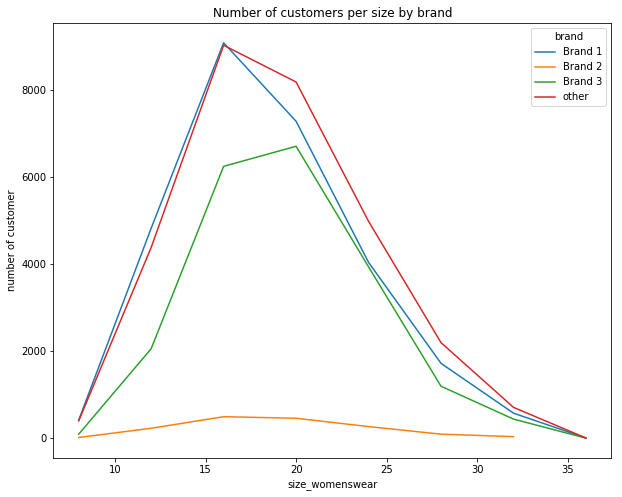

In [9]:
pd.pivot_table(raw_train,  index='size_womenswear', values='customer_id',
                       aggfunc=np.size, columns='brand').plot(kind='line', figsize=(10,8), 
                       title='Number of customers per size by brand')
plt.ylabel('number of customer')
plt.show()

#result: the highest return rate usually ranging from 16-20 on each brand
#        different graphic on brand 2 may because of 
#        smaller number of data for that brand

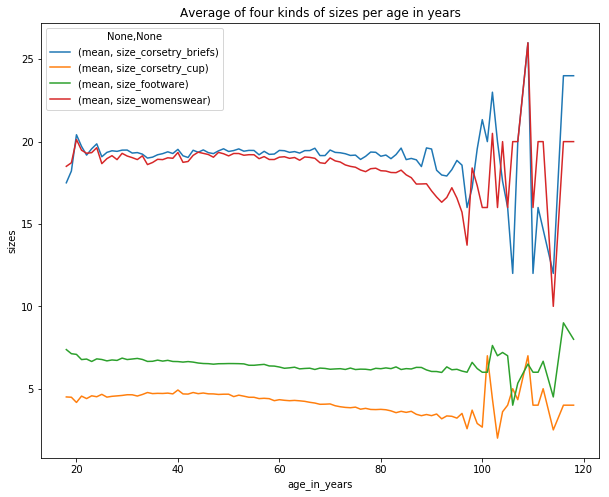

In [10]:
pd.pivot_table(raw_train, index=['age_in_years'], 
                       values=['size_womenswear', 'size_corsetry_cup',
                              'size_corsetry_briefs', 'size_footware'], 
                       aggfunc=[np.mean]).plot(kind='line', figsize=(10,8),
                        title='Average of four kinds of sizes per age in years')
plt.ylabel('sizes')
plt.show()

#result: after age 60, all sizes have tendency to become smaller
#        however, after age 90, there is huge volatility trend
#        this might because the data for those ages are limited

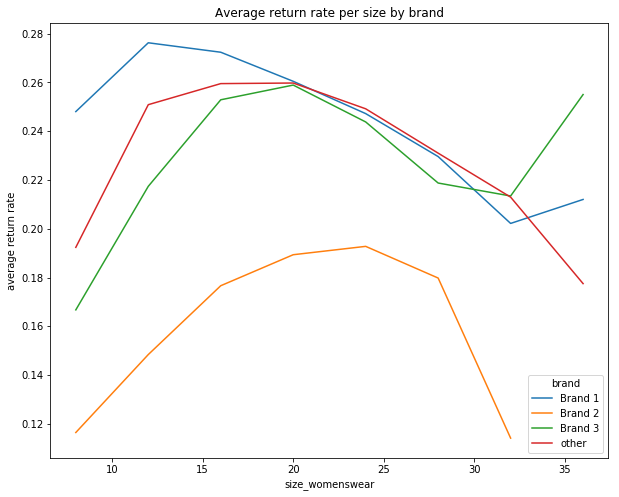

In [11]:
pd.pivot_table(raw_train,  index='size_womenswear', values='return_rate',
                       aggfunc=np.mean, columns='brand').plot(kind='line', figsize=(10,8), 
                       title='Average return rate per size by brand')
plt.ylabel('average return rate')
plt.show()

#result: the higher return rate ranging from size 12 to 28 for all brands

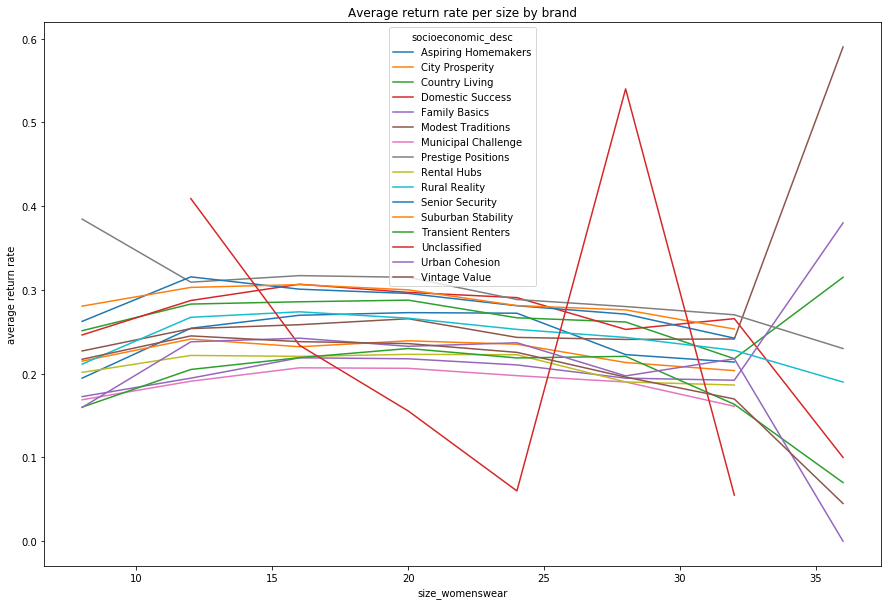

In [12]:
pd.pivot_table(raw_train,  index='size_womenswear', values='return_rate',
                       aggfunc=np.mean, columns='socioeconomic_desc').plot(kind='line', figsize=(15,10), 
                       title='Average return rate per size by brand')
plt.ylabel('average return rate')
plt.show()

#result: the high return of return rate's groups are
#           prestige positions, suburban stability, and senior security
#        the low return groups of return rate's groups are
#           municipal challenge, family basics and transient renters

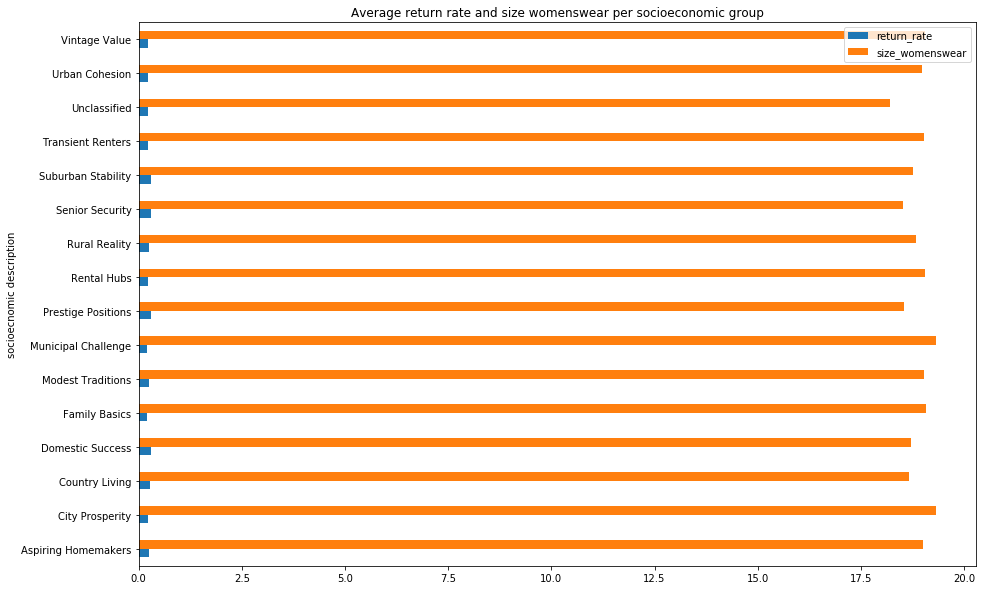

In [13]:
pd.pivot_table(raw_train,  values=['return_rate', 'size_womenswear'],
                     index='socioeconomic_desc', aggfunc=np.mean).plot(kind='barh', figsize=(15,10), 
                       title='Average return rate and size womenswear per socioeconomic group')
plt.ylabel('socioecnomic description')
plt.show()

#result: the top four of high return rate (prestige positions, suburban stability, and senior security)
#           tend to have lower average size of womenswear than others
#        the top four of low return rate tend to have higher average size womenswear